<h1>Lighten Up!</h1>

In [25]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<h3>Objective 1:</h3>
Connect to the Xtralien

In [26]:
#Use your connect script from 011
from connect import *
s = connect_any()

Connected
Well done for usuing Linux.


<h3>Objective 2:</h3>
Measure a voltage-current sweep of and LED


In [27]:
#Use the Xtralien sweep command
s.write(b"smu1 sweep 1.5 0.01 2.3")

23

In [28]:
#read the response
datastr = s.readline()

In [29]:
datastr

'[1.5012,-5.1498e-06;1.5113,-5.2448e-06;1.5213,-4.9782e-06;1.5311,-4.9439e-06;1.541,-4.6636e-06;1.5511,-4.4552e-06;1.5611,-4.2387e-06;1.5712,-3.9336e-06;1.5812,-3.4582e-06;1.5911,-2.9824e-06;1.6012,-2.3184e-06;1.6112,-1.2217e-06;1.6213,-4.0884e-07;1.6312,8.2985e-07;1.6413,2.4947e-06;1.6512,4.4003e-06;1.6613,6.9075e-06;1.6712,9.9881e-06;1.6809,1.3747e-05;1.6909,1.8412e-05;1.7011,2.4126e-05;1.711,3.137e-05;1.7209,4.0504e-05;1.7309,5.1875e-05;1.741,6.5856e-05;1.7511,8.3096e-05;1.7609,0.0001044;1.771,0.00013062;1.7811,0.00016337;1.791,0.00020358;1.8009,0.00025242;1.8109,0.00031279;1.8208,0.00038724;1.8309,0.00047876;1.8404,0.00058595;1.8502,0.00072221;1.8601,0.00089023;1.87,0.0010958;1.8797,0.0013445;1.8894,0.0016471;1.8989,0.0020138;1.9086,0.0024567;1.918,0.0029803;1.9274,0.003602;1.9366,0.0043328;1.9459,0.0051917;1.9549,0.0061815;1.9637,0.0073092;1.9723,0.0085989;1.9807,0.010004;1.989,0.011638;1.9971,0.013438;2.005,0.01543;2.0128,0.017633;2.0203,0.020045;2.0276,0.022654;2.0347,0.024618;2

<h3>Objective 3:</h3>
Plot the data. 

In [30]:
#need to convert raw string data into something useful!
import re #will need this

def raw_convert(string):
    #first remove all characters that are not ,;- or int
    string = re.sub('[\[\]\n]', '', string)
    
    #next split string at to create a list;
    data = string.split(';')
    
    #now split again at ,
    data = [x.split(',') for x in data]
    
    #finally need to convert each string in list to float
    data = [[float(y) for y in x] for x in data]

    return data

In [31]:
data = raw_convert(datastr)

In [32]:
#data

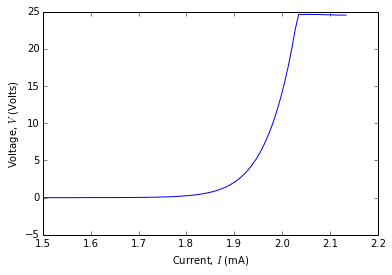

In [33]:
#from here you can either write the data to file or plot it
#remember to transpose before plotting
data_trans = transpose(data)
x = data_trans[0]
y = data_trans[1]*1000 #convert to mA
plot(x, y)
xlabel('Current, $I$ (mA)')
ylabel('Voltage, $V$ (Volts)')

In [34]:
#If your plot doesn't look like that abve then you've probably got your LED connectede the wrong way around.


<h3>Objective 4</h3>
Estimate $V_d$

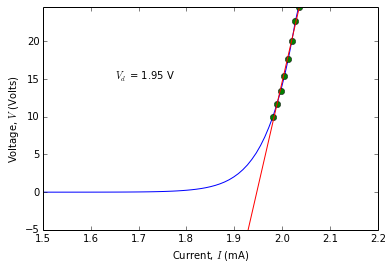

In [35]:
from ipywidgets import *

def regression(mini, maxi):
    m, c =polyfit(x[mini:maxi], y[mini:maxi], 1)
    return m, c

def plot_iv(mini, maxi):
    fig = figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_xlabel('Current, $I$ (mA)')
    ax.set_ylabel('Voltage, $V$ (Volts)')
    ax.plot(x[mini:maxi], y[mini:maxi], 'o')
    m, c = regression(mini, maxi)
    xi = linspace(min(x), max(x), 1000)
    yi = m*xi+c
    ax.plot(xi, yi, '-', color='red')
    #print('$V_d$ = {0} V'.format('test'))
    ax.set_ylim([-5, max(y)])
    idx = abs(yi-0).argmin()
    ax.text(min(x)*1.1, 15, '$V_d$ = {0:.2f} V'.format(xi[idx]))
    
mini_s = IntSlider(min=0, max=len(x)-1, step=1, value=0)
maxi_s = IntSlider(min=0, max=len(x)-1, step = 1,value=len(x)-1)

interactive(plot_iv, mini=mini_s, maxi=maxi_s)

#This sort of thing is really useful for (alpha.hv)**2 plots and extracting band gaps from transmission data
    

In [36]:
data

[[1.5012, -5.1498e-06],
 [1.5113, -5.2448e-06],
 [1.5213, -4.9782e-06],
 [1.5311, -4.9439e-06],
 [1.541, -4.6636e-06],
 [1.5511, -4.4552e-06],
 [1.5611, -4.2387e-06],
 [1.5712, -3.9336e-06],
 [1.5812, -3.4582e-06],
 [1.5911, -2.9824e-06],
 [1.6012, -2.3184e-06],
 [1.6112, -1.2217e-06],
 [1.6213, -4.0884e-07],
 [1.6312, 8.2985e-07],
 [1.6413, 2.4947e-06],
 [1.6512, 4.4003e-06],
 [1.6613, 6.9075e-06],
 [1.6712, 9.9881e-06],
 [1.6809, 1.3747e-05],
 [1.6909, 1.8412e-05],
 [1.7011, 2.4126e-05],
 [1.711, 3.137e-05],
 [1.7209, 4.0504e-05],
 [1.7309, 5.1875e-05],
 [1.741, 6.5856e-05],
 [1.7511, 8.3096e-05],
 [1.7609, 0.0001044],
 [1.771, 0.00013062],
 [1.7811, 0.00016337],
 [1.791, 0.00020358],
 [1.8009, 0.00025242],
 [1.8109, 0.00031279],
 [1.8208, 0.00038724],
 [1.8309, 0.00047876],
 [1.8404, 0.00058595],
 [1.8502, 0.00072221],
 [1.8601, 0.00089023],
 [1.87, 0.0010958],
 [1.8797, 0.0013445],
 [1.8894, 0.0016471],
 [1.8989, 0.0020138],
 [1.9086, 0.0024567],
 [1.918, 0.0029803],
 [1.9274, 0.00